# Best Post Award
#### Approach:
We'll choose election day 2008.

November 4, 2008 (in epochs range = 1225774800 - 1225861199)
### Results:

### Top Comment: 
> "Dear Rest of The World\n\nWe didn't fuck it up\n\nSigned,\n\nAmerica"
>
> -- <cite>[deleted]</cite>


Since this author is deleted we'll use the second most upvoted comment
### Next Comment:
> 'Dear America,\n\nCongrats!\n\nRegards,\nRest of the World'
>
> -- <cite>rockus</cite>

Top comment comes from user 'rockus.' Let's find their top 3 comments.

In [11]:
df = spark.read.json('hdfs://orion11:25001/RC_2008-11.bz2')

In [13]:
df = df.select('author', 'body', 'created_utc', 'score', 'subreddit')

In [18]:
df.count()

792310

In [27]:
top_election_day_posts = df \
    .filter((1225774800 <= df.created_utc) & (df.created_utc <= 1225861199)) \
    .sort(df.score.desc()) \
    .take(2)
top_election_day_posts

[Row(author='[deleted]', body="Dear Rest of The World\n\nWe didn't fuck it up\n\nSigned,\n\nAmerica", created_utc='1225858444', score=2108, subreddit='politics'),
 Row(author='rockus', body='Dear America,\n\nCongrats!\n\nRegards,\nRest of the World', created_utc='1225858825', score=1143, subreddit='politics')]

---
# Top Comments by user 'rockus'

#### Approach:
Search entire dataset for comments by user 'rockus'. Turns out this takes way too long so we'll search for this user's comments in the sample data set and circle back for a more in depth search later if time permits.

#### Results:
> "This mess shows how far reaching is the impact of a biased intelligentsia in a country. Thwarting a consensus by ignoring proofs just because of the fear of being proved wrong. These historians  totally subvert the meaning of being a scholar. The lack of academics without overt political bias is really hurting the nation. Its either commie or a sanghi. Even if you are neither, you are branded as one or the other."
>
> -- <cite>rockus</cite>

> "That revenue itself would fund the Mars program substantially if I am not wrong."
>
> -- <cite>rockus</cite>

> "What about the livelihood of butchers and shop assistants? An additional day-off could mean that those on daily wages lose a day's pay. Also, the meat that they store in the freezer that would have been good for another day is wasted."
>
> -- <cite>rockus</cite>



In [1]:
# Create list of all files so we can load files into dataframes in a loop
list_of_files = ['RC_2005-12.bz2', \
                 'RC_2006-01.bz2','RC_2006-02.bz2','RC_2006-03.bz2','RC_2006-04.bz2','RC_2006-05.bz2','RC_2006-06.bz2','RC_2006-07.bz2','RC_2006-08.bz2','RC_2006-09.bz2','RC_2006-10.bz2','RC_2006-11.bz2','RC_2006-12.bz2',\
                 'RC_2007-01.bz2','RC_2007-02.bz2','RC_2007-03.bz2','RC_2007-04.bz2','RC_2007-05.bz2','RC_2007-06.bz2','RC_2007-07.bz2','RC_2007-08.bz2','RC_2007-09.bz2','RC_2007-10.bz2','RC_2007-11.bz2','RC_2007-12.bz2',\
                 'RC_2008-01.bz2','RC_2008-02.bz2','RC_2008-03.bz2','RC_2008-04.bz2','RC_2008-05.bz2','RC_2008-06.bz2','RC_2008-07.bz2','RC_2008-08.bz2','RC_2008-09.bz2','RC_2008-10.bz2','RC_2008-11.bz2','RC_2008-12.bz2',\
                 'RC_2009-01.bz2','RC_2009-02.bz2','RC_2009-03.bz2','RC_2009-04.bz2','RC_2009-05.bz2','RC_2009-06.bz2','RC_2009-07.bz2','RC_2009-08.bz2','RC_2009-09.bz2','RC_2009-10.bz2','RC_2009-11.bz2','RC_2009-12.bz2',\
                 'RC_2010-01.bz2','RC_2010-02.bz2','RC_2010-03.bz2','RC_2010-04.bz2','RC_2010-05.bz2','RC_2010-06.bz2','RC_2010-07.bz2','RC_2010-08.bz2','RC_2010-09.bz2','RC_2010-10.bz2','RC_2010-11.bz2','RC_2010-12.bz2',\
                 'RC_2011-01.bz2','RC_2011-02.bz2','RC_2011-03.bz2','RC_2011-04.bz2','RC_2011-05.bz2','RC_2011-06.bz2','RC_2011-07.bz2','RC_2011-08.bz2','RC_2011-09.bz2','RC_2011-10.bz2','RC_2011-11.bz2','RC_2011-12.bz2',\
                 'RC_2012-01.bz2','RC_2012-02.bz2','RC_2012-03.bz2','RC_2012-04.bz2','RC_2012-05.bz2','RC_2012-06.bz2','RC_2012-07.bz2','RC_2012-08.bz2','RC_2012-09.bz2','RC_2012-10.bz2','RC_2012-11.bz2','RC_2012-12.bz2',\
                 'RC_2013-01.bz2','RC_2013-02.bz2','RC_2013-03.bz2','RC_2013-04.bz2','RC_2013-05.bz2','RC_2013-06.bz2','RC_2013-07.bz2','RC_2013-08.bz2','RC_2013-09.bz2','RC_2013-10.bz2','RC_2013-11.bz2','RC_2013-12.bz2',\
                 'RC_2014-01.bz2','RC_2014-02.bz2','RC_2014-03.bz2','RC_2014-04.bz2','RC_2014-05.bz2','RC_2014-06.bz2','RC_2014-07.bz2','RC_2014-08.bz2','RC_2014-09.bz2','RC_2014-10.bz2','RC_2014-11.bz2','RC_2014-12.bz2',\
                 'RC_2015-01.bz2','RC_2015-02.bz2','RC_2015-03.bz2','RC_2015-04.bz2','RC_2015-05.bz2','RC_2015-06.bz2','RC_2015-07.bz2','RC_2015-08.bz2','RC_2015-09.bz2','RC_2015-10.bz2','RC_2015-11.bz2','RC_2015-12.bz2',\
                 'RC_2016-01.bz2','RC_2016-02.bz2','RC_2016-03.bz2','RC_2016-04.bz2','RC_2016-05.bz2','RC_2016-06.bz2','RC_2016-07.bz2','RC_2016-08.bz2','RC_2016-09.bz2','RC_2016-10.bz2','RC_2016-11.bz2','RC_2016-12.bz2',\
                 'RC_2017-01.bz2','RC_2017-02.bz2','RC_2017-03.bz2',\
                 'RES-RC_2018-01.zst','RES-RC_2018-02.zst','RES-RC_2018-03.zst','RES-RC_2018-04.zst','RES-RC_2018-05.zst','RES-RC_2018-06.zst','RES-RC_2018-07.zst','RES-RC_2018-08.zst','RES-RC_2018-09.zst','RES-RC_2018-10.zst','RES-RC_2018-11.zst','RES-RC_2018-12.zst',\
                 'RES-RC_2019-01.zst','RES-RC_2019-02.zst','RES-RC_2019-03.zst','RES-RC_2019-04.zst','RES-RC_2019-05.zst','RES-RC_2019-06.zst','RES-RC_2019-07.zst','RES-RC_2019-08.zst','RES-RC_2019-09.zst','RES-RC_2019-10.zst','RES-RC_2019-11.zst','RES-RC_2019-12.zst',\
                 'RES-RC_2020-01.zst','RES-RC_2020-02.zst','RES-RC_2020-03.zst','RES-RC_2020-04.zst','RES-RC_2020-05.zst','RES-RC_2020-06.zst','RES-RC_2020-07.zst','RES-RC_2020-08.zst','RES-RC_2020-09.zst','RES-RC_2020-10.zst','RES-RC_2020-11.zst','RES-RC_2020-12.zst']

In [15]:
for file in list_of_files[30:35]:
    search_for_rockus_df = spark.read.json('hdfs://orion11:25001/' + file)
    rockus_posts = search_for_rockus_df.filter(search_for_rockus_df.author == 'rockus')\
                                       .select('author', 'body', 'created_utc', 'score', 'subreddit')
    if rockus_posts.count() > 0:
        print(file + ": " + str(rockus_posts.count()))
        for post in rockus_posts.sort(rockus_posts.score.desc()).take(3):
            print("Score: " + str(post.score))


RC_2008-08.bz2: 3
Score: 6
Score: 1
Score: 1
RC_2008-09.bz2: 2
Score: 3
Score: -1
RC_2008-10.bz2: 2
Score: 21
Score: 3


### This takes an insane amount of time. Let's try on the sample data..

In [17]:
sample_df = spark.read.json('hdfs://orion11:25001/sampled_reddit_v2')

In [18]:
sample_df.count()

30907764

In [20]:
rockus_posts_sample = sample_df.filter(sample_df.author == 'rockus')\
                               .select('author', 'score', 'body', 'subreddit', 'created_utc')\
                               .sort(sample_df.score.desc())\
                               .take(3)
rockus_posts_sample

[Row(author='rockus', score=15, body='This mess shows how far reaching is the impact of a biased intelligentsia in a country. Thwarting a consensus by ignoring proofs just because of the fear of being proved wrong. These historians  totally subvert the meaning of being a scholar. The lack of academics without overt political bias is really hurting the nation. Its either commie or a sanghi. Even if you are neither, you are branded as one or the other.', subreddit='india', created_utc='1453367323'),
 Row(author='rockus', score=11, body='That revenue itself would fund the Mars program substantially if I am not wrong.', subreddit='worldnews', created_utc='1361457235'),
 Row(author='rockus', score=9, body="What about the livelihood of butchers and shop assistants? An additional day-off could mean that those on daily wages lose a day's pay. Also, the meat that they store in the freezer that would have been good for another day is wasted.", subreddit='india', created_utc='1366963617')]

-----
# Subreddit Growth
#### Approach:
Our approach for this is going to be to search for all of the subreddits that were posted to on the first day of the year and all of the subreddits that were posted to on the last day of the year. For the purposes of this search we're considering any subreddit that doesn't get a single comment in that 24hr period as 'inactive' and we're ignoring it. 

Jan 1, 12:00:00AM - Jan 1, 11:59:59PM -> to epochs 1577836800 - 1577923199

Dec 31, 12:00:00AM - Dec 31, 11:59:59PM -> to epochs 1609372800 - 1609459199

#### Results:
Total  active subreddits:

    - Beginning of Year: 18,065
    - End of Year      : 24,201

In [24]:
beg_2020_df = spark.read.json('hdfs://orion11:25001/RES-RC_2020-01.zst')
end_2020_df = spark.read.json('hdfs://orion11:25001/RES-RC_2020-12.zst')

In [32]:
# Confirm that we don't have any posts from prior to Jan 1 12:00:00AM
beg_2020_df.filter(beg_2020_df.created_utc < 1577836800).count()

0

In [43]:
# Count number of comments on Jan 1, 2020
first_day_df = beg_2020_df.filter(beg_2020_df.created_utc < 1577923199)
first_day_df.count()

278807

In [34]:
# Confirm we don't have any posts from after Dec 31 11:59:59PM
end_2020_df.filter(end_2020_df.created_utc > 1609459199).count()

0

In [41]:
# Count number of comments on Dec 31, 2020
last_day_df = end_2020_df.filter(end_2020_df.created_utc > 1609372800)
last_day_df.count()

320654

In [44]:
# Count unique subreddits from first day of the year
first_day_df.select('subreddit').distinct().count()

18065

In [45]:
# Count unique subreddits from last day of the year
last_day_df.select('subreddit').distinct().count()

24201

---
# Busiest Months

#### Approach: 
We'll sample 5 years worth of posts--this should be sufficient. 2006 - 2010

#### Results:
See graph below. I may not have understood the best way to normalize these results because I don't see a clear way to tell what month gets the most posts other than to say later months always get more posts but this is obvious because the site is growing.

In [27]:
month_to_posts = []

for file in list_of_files[1:61]:
    busy_df = spark.read.json('hdfs://orion11:25001/' + file)
    count = busy_df.count()
    month_to_posts.append([file[3:-4], count])

In [92]:
import pandas as pd
posts_2006 = pd.DataFrame(month_to_posts[:12], columns = ['Month', 'Comments'])
posts_2007 = pd.DataFrame(month_to_posts[12:24], columns = ['Month', 'Comments'])
posts_2008 = pd.DataFrame(month_to_posts[24:36], columns = ['Month', 'Comments'])
posts_2009 = pd.DataFrame(month_to_posts[36:48], columns = ['Month', 'Comments'])
posts_2010 = pd.DataFrame(month_to_posts[48:60], columns = ['Month', 'Comments'])

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
posts_2006['Comments Normalized'] = scaler.fit_transform(posts_2006[['Comments']])
posts_2007['Comments Normalized'] = scaler.fit_transform(posts_2007[['Comments']])
posts_2008['Comments Normalized'] = scaler.fit_transform(posts_2008[['Comments']])
posts_2009['Comments Normalized'] = scaler.fit_transform(posts_2009[['Comments']])
posts_2010['Comments Normalized'] = scaler.fit_transform(posts_2010[['Comments']])

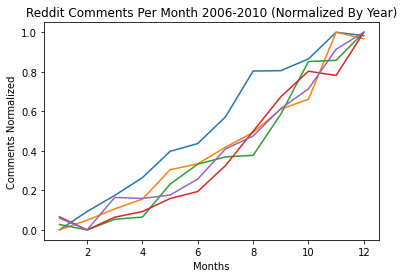

In [113]:
import matplotlib.pyplot as plt
plt.title("Reddit Comments Per Month 2006-2010 (Normalized By Year)")
plt.ylabel("Comments Normalized")
plt.xlabel("Months")
plt.plot(posts_2006['Month'], posts_2006['Comments Normalized'])
plt.plot(posts_2007['Month'], posts_2007['Comments Normalized'])
plt.plot(posts_2008['Month'], posts_2008['Comments Normalized'])
plt.plot(posts_2009['Month'], posts_2009['Comments Normalized'])
plt.plot(posts_2010['Month'], posts_2010['Comments Normalized'])


---
# Readability
#### Approach: We'll compare /r/karate and /r/jiujitsu for readability using the sample data set.
#### Results: See graphs below.
We don't see a clear winner in the battle of "Who is smarter? bjj vs karate."
### /r/karate vs /r/jiujitsu

In [39]:
# Define our readability function
import textstat

def check_readability(text):
    gf_index = textstat.gunning_fog(text)
    reading_ease = textstat.flesch_reading_ease(text)
    grade_level = textstat.flesch_kincaid_grade(text)
    return str(gf_index) + " " + str(reading_ease) + " " + str(grade_level)

'0.4 36.62 8.4'

In [2]:
readability_df = spark.read.json('hdfs://orion11:25001/sampled_reddit_v2')

In [77]:
# Filter for our subreddit and calculate readability
from pyspark.sql.functions import udf
from pyspark.sql.functions import col
check_readability_udf = udf(check_readability)
karate_scores = readability_df.filter(readability_df.subreddit == 'karate').withColumn("Readability", check_readability_udf(col("body"))).select('Readability').collect()
bjj_scores = readability_df.filter(readability_df.subreddit == 'bjj').withColumn("Readability", check_readability_udf(col("body"))).select('Readability').collect()

In [78]:
# Convert readability scores from strings to floats. Throw out entries that are out of standard range.
karate_readability_scores = []
bjj_readability_scores = []
for row in karate_scores:
    nums = row.Readability.split()
    my_floats = []
    for num in nums:
       my_floats.append(float(num))
    if my_floats[0] > 20 or my_floats[0] < 0:
        continue
    if my_floats[1] > 100 or my_floats[1] < 0:
        continue
    if my_floats[2] > 18 or my_floats[2] < 0:
        continue
    karate_readability_scores.append(my_floats)
for row in bjj_scores:
    nums = row.Readability.split()
    my_floats = []
    for num in nums:
       my_floats.append(float(num))
    if my_floats[0] > 20 or my_floats[0] < 0:
        continue
    if my_floats[1] > 100 or my_floats[1] < 0:
        continue
    if my_floats[2] > 18 or my_floats[2] < 0:
        continue
    bjj_readability_scores.append(my_floats)

In [79]:
# Convert lists to DataFrames
import pandas as pd
karate_df = pd.DataFrame(karate_readability_scores, columns= ['Gunning Fog', 'Reading Ease', 'Flesch Kincaid Grade'])
bjj_df = pd.DataFrame(bjj_readability_scores, columns= ['Gunning Fog', 'Reading Ease', 'Flesch Kincaid Grade'])

Text(0.5, 1.0, 'Gunning Fog Index')

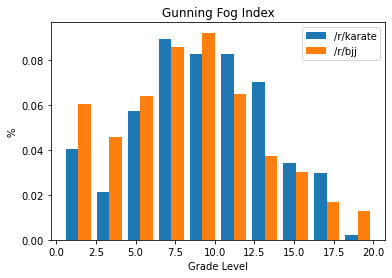

In [80]:
plt.hist([karate_df['Gunning Fog'], bjj_df['Gunning Fog']], label=['/r/karate', '/r/bjj'], density=True)
plt.xlabel('Grade Level')
plt.ylabel('%')
plt.legend()
plt.title('Gunning Fog Index')

Text(0.5, 1.0, 'Reading Ease')

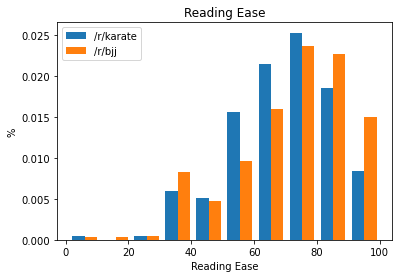

In [81]:
plt.hist([karate_df['Reading Ease'], bjj_df['Reading Ease']], label=['/r/karate', '/r/bjj'], density=True)
plt.xlabel('Reading Ease')
plt.ylabel('%')
plt.legend()
plt.title('Reading Ease')

Text(0.5, 1.0, 'Flesch Kincaid Grade')

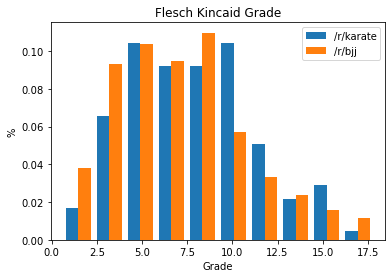

In [82]:
plt.hist([karate_df['Flesch Kincaid Grade'], bjj_df['Flesch Kincaid Grade']], label=['/r/karate', '/r/bjj'], density=True)
plt.xlabel('Grade')
plt.ylabel('%')
plt.legend()
plt.title('Flesch Kincaid Grade')

---
# Toxicity
#### Approach: 
Follow same approach as with readability.

In [8]:
from pyspark.sql.functions import udf
from pyspark.sql.functions import col
from textblob import TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return str(polarity) + " " + str(subjectivity)
analyze_sentiment_udf = udf(analyze_sentiment)

In [86]:
# Filter for our subreddit and calculate sentiment
yoga_scores = readability_df.filter(readability_df.subreddit == 'yoga').withColumn("Sentiment", analyze_sentiment_udf(col("body"))).select('Sentiment').collect()
anarchism_scores = readability_df.filter(readability_df.subreddit == 'Anarchism').withColumn("Sentiment", analyze_sentiment_udf(col("body"))).select('Sentiment').collect()

In [94]:
# Convert sentiment scores from strings to floats. 
yoga_sentiment_scores = []
anarchism_sentiment_scores = []
for row in yoga_scores:
    nums = row.Sentiment.split()
    my_floats = []
    for num in nums:
       my_floats.append(float(num))
    yoga_sentiment_scores.append(my_floats)
for row in anarchism_scores:
    nums = row.Sentiment.split()
    my_floats = []
    for num in nums:
       my_floats.append(float(num))
    anarchism_sentiment_scores.append(my_floats)

In [95]:
# Convert lists to DataFrames
yoga_df = pd.DataFrame(yoga_sentiment_scores, columns= ['Polarity', 'Subjectivity'])
anarchism_df = pd.DataFrame(anarchism_sentiment_scores, columns= ['Polarity', 'Subjectivity'])

Text(0.5, 1.0, '/r/yoga vs /r/Anarchism Polarity')

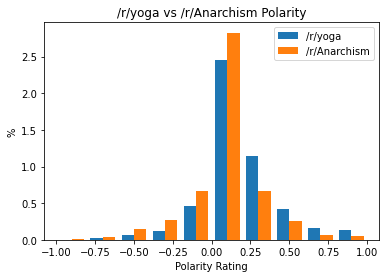

In [101]:
plt.hist([yoga_df['Polarity'], anarchism_df['Polarity']], label=['/r/yoga', '/r/Anarchism'], density=True)
plt.xlabel('Polarity Rating')
plt.ylabel('%')
plt.legend()
plt.title('/r/yoga vs /r/Anarchism Polarity')

Text(0.5, 1.0, '/r/yoga vs /r/Anarchism Subjectivity')

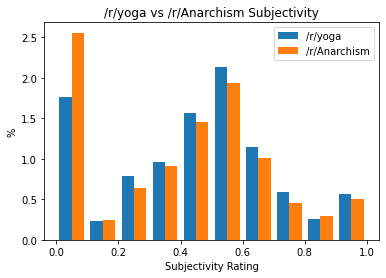

In [102]:
plt.hist([yoga_df['Subjectivity'], anarchism_df['Subjectivity']], label=['/r/yoga', '/r/Anarchism'], density=True)
plt.xlabel('Subjectivity Rating')
plt.ylabel('%')
plt.legend()
plt.title('/r/yoga vs /r/Anarchism Subjectivity')

---
# Targeted Advertising
#### Approach:
One thing that would be useful in finding a user's interests might be returning all of the distinct subreddits that they're active in.

In [103]:
sample_df = spark.read.json('hdfs://orion11:25001/sampled_reddit_v2')

In [106]:
sample_df.filter(sample_df.author == 'maxwellhill').select('subreddit').distinct().collect()

[Row(subreddit='AskReddit'),
 Row(subreddit='reddit.com'),
 Row(subreddit='worldnews'),
 Row(subreddit='science'),
 Row(subreddit='Christianity'),
 Row(subreddit='blog'),
 Row(subreddit='SuicideWatch'),
 Row(subreddit='redditoroftheday'),
 Row(subreddit='funny')]

---
# COVID-19 Origin
#### Approach:
First day of lockdown in SF was 3/17/2020. Start from this day and go backwards searching for posts mentioning covid until we don't find any. Index of RES-RC_2020-03.zst in list_of_files is 162 so we'll start here and go back.

#### Results:
 - Mar 2020 (Index 162) - Found covid posts
 - Jan 2020 (Index 160) - Found covid posts
 - Dec 2019 (Inded 159) - Found NO covid posts
 
Now we did deeper into Jan 2020 to see when the first covid comment was. We find there were comments going back to Jan 9 but there were no comments before Jan 7. So we filter for all comments before Jan 9 and sort by comment date and return the oldest. 

### First Covid Comment:

> "# *China virus*"
>
> -- <cite>MrWafflesNBacon</cite>  
>  January 7, 2020 12:11:15 PM GMT

In [57]:
from pyspark.sql.functions import lower
string_list = ['covid-19', 'corona virus', 'sars-cov','wuhan virus', 'chinese virus', 'china virus']

In [49]:
search_df = spark.read.json('hdfs://orion11:25001/' + list_of_files[160])
results_df = search_df.filter(lower(search_df.body).rlike('|'.join(string_list)))\
                      .sort(search_df.created_utc.desc())
results_df.take(5)

[Row(body='Plus, we cant compare movies with real life. If it was the other way around, if the Wuhan virus started in Manila, I am quite sure China would close its doors to us without batting an eyelash, no doubt about it.'),
 Row(body='Corona virus gone digital now..RIP'),
 Row(body='every chinese person: why did god give us the corona virus.\n\nalso every chinese person'),
 Row(body='The irony of having the flu while writing all this. I felt like crap for the past few days, tried to avoid coughing in stores. Better today.\n\nThere was a well off looking older guy in a shopping center that sneezed and then loudly declared “Heh-heh corona virus!” I almost died xD'),
 Row(body='If Tony gets yanked, Corona virus is probably one of the most plausible paths to disaster')]

In [61]:
results_df = search_df.filter(search_df.created_utc < 1578614343)\
                      .filter(lower(search_df.body).rlike('|'.join(string_list)))\
                      .sort(search_df.created_utc)\
                      .select('author', 'body', 'created_utc', 'subreddit', 'score', 'permalink')
results_df.take(1)

[Row(author='MrWafflesNBacon', body='# *China virus*', created_utc=1578399075, subreddit='insaneparents', score=15, permalink='/r/insaneparents/comments/el2ods/not_directly_about_parenting_but_i_thought_this/fdgj9sr/')]

---
# COVID-19 Attitudes
#### Approach: 

We'll track how sentiment in COVID comments changed in the three months after SF started it's lockdown. 

In [4]:
from pyspark.sql.functions import lower
string_list = ['covid-19', 'corona virus', 'sars-cov','wuhan virus', 'chinese virus', 'china virus']

In [3]:
df = spark.read.json('hdfs://orion11:25001/' + list_of_files[163])

In [9]:
april_results = df.filter(lower(df.body).rlike('|'.join(string_list))).withColumn("Sentiment", analyze_sentiment_udf(col("body"))).select('Sentiment').collect()

In [11]:
import pandas as pd
april_sentiment_scores = []
for row in april_results:
    nums = row.Sentiment.split()
    my_floats = []
    for num in nums:
       my_floats.append(float(num))
    april_sentiment_scores.append(my_floats)
april_df = pd.DataFrame(april_sentiment_scores, columns= ['Polarity', 'Subjectivity'])

In [15]:
df2 = spark.read.json('hdfs://orion11:25001/' + list_of_files[164])

In [16]:
may_results = df2.filter(lower(df2.body).rlike('|'.join(string_list))).withColumn("Sentiment", analyze_sentiment_udf(col("body"))).select('Sentiment').collect()

In [17]:
may_sentiment_scores = []
for row in may_results:
    nums = row.Sentiment.split()
    my_floats = []
    for num in nums:
       my_floats.append(float(num))
    may_sentiment_scores.append(my_floats)
may_df = pd.DataFrame(may_sentiment_scores, columns= ['Polarity', 'Subjectivity'])

In [18]:
df3 = spark.read.json('hdfs://orion11:25001/' + list_of_files[165])

In [23]:
june_results = df3.filter(lower(df3.body).rlike('|'.join(string_list))).withColumn("Sentiment", analyze_sentiment_udf(col("body"))).select('Sentiment').collect()

In [24]:
june_sentiment_scores = []
for row in may_results:
    nums = row.Sentiment.split()
    my_floats = []
    for num in nums:
       my_floats.append(float(num))
    june_sentiment_scores.append(my_floats)
june_df = pd.DataFrame(june_sentiment_scores, columns= ['Polarity', 'Subjectivity'])

Text(0.5, 1.0, 'April, May, June Covid Polarity')

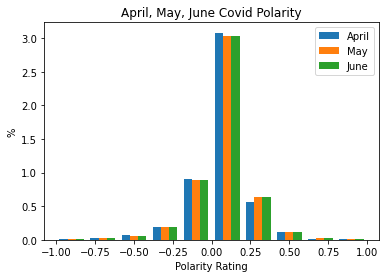

In [26]:
import matplotlib.pyplot as plt
plt.hist([april_df['Polarity'], may_df['Polarity'], june_df['Polarity']], label=['April', 'May', 'June'], density=True)
plt.xlabel('Polarity Rating')
plt.ylabel('%')
plt.legend()
plt.title('April, May, June Covid Polarity')

Text(0.5, 1.0, 'April, May, June Covid Subjectivity')

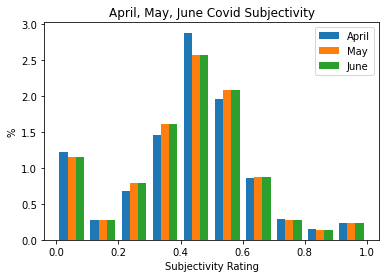

In [27]:
plt.hist([april_df['Subjectivity'], may_df['Subjectivity'], june_df['Subjectivity']], label=['April', 'May', 'June'], density=True)
plt.xlabel('Subjectivity Rating')
plt.ylabel('%')
plt.legend()
plt.title('April, May, June Covid Subjectivity')

---
# Design Own Question

#### Background:

A theory has recently been put forward online that Ghislaine Maxwell was behind the reddit account /u/maxwellhil, a powermod of frontpage subs, account with 8th most link karma, and first account ot reach a million Karma

#### Approach: 

Let's see what we can find out about this user. We'll start with the sample data and see when they first started commenting and when they stopped commenting. 

#### Findings from Sample Set:

First Post - March 29, 2006 10:27 PM GMT
Last Post  - March 9, 2017 10:17 PM GMT
Total Post - 13
Subreddits - worldnews, science, christianity, blog, suicidewatch, redditoroftheday, funny

#### Findings from Full Data Set:

See graph below for number of comments per month from Mar 2006 - Jan 2012



In [28]:
sample_df = spark.read.json('hdfs://orion11:25001/sampled_reddit_v2')

In [30]:
maxwell_posts = sample_df.filter(sample_df.author == 'maxwellhill').sort(sample_df.created_utc).collect()

In [ ]:
list_of_posts = []
for file in list_of_files[:72]:
    df = spark.read.json('hdfs://orion11:25001/' + file)
    posts = df.filter(df.author == 'maxwellhill').select('created_utc', 'body', 'subreddit').collect()
    list_of_posts.append(posts)
    print(len(posts))

In [56]:
posts_per_month = []
for posts in list_of_posts:
    posts_per_month.append(len(posts))

In [65]:
months = list_of_files[:72]
months2 = []
for month in months:
    months2.append(month[3:10])
months = months2
months

['2005-12',
 '2006-01',
 '2006-02',
 '2006-03',
 '2006-04',
 '2006-05',
 '2006-06',
 '2006-07',
 '2006-08',
 '2006-09',
 '2006-10',
 '2006-11',
 '2006-12',
 '2007-01',
 '2007-02',
 '2007-03',
 '2007-04',
 '2007-05',
 '2007-06',
 '2007-07',
 '2007-08',
 '2007-09',
 '2007-10',
 '2007-11',
 '2007-12',
 '2008-01',
 '2008-02',
 '2008-03',
 '2008-04',
 '2008-05',
 '2008-06',
 '2008-07',
 '2008-08',
 '2008-09',
 '2008-10',
 '2008-11',
 '2008-12',
 '2009-01',
 '2009-02',
 '2009-03',
 '2009-04',
 '2009-05',
 '2009-06',
 '2009-07',
 '2009-08',
 '2009-09',
 '2009-10',
 '2009-11',
 '2009-12',
 '2010-01',
 '2010-02',
 '2010-03',
 '2010-04',
 '2010-05',
 '2010-06',
 '2010-07',
 '2010-08',
 '2010-09',
 '2010-10',
 '2010-11',
 '2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11']

In [74]:
posts_per_month_df = pd.DataFrame({
    'Months': months,
    'Posts': posts_per_month
})

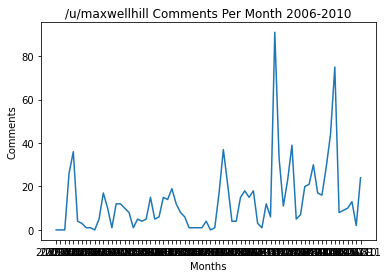

In [76]:
import matplotlib.pyplot as plt
plt.title("/u/maxwellhill Comments Per Month 2006-2010")
plt.ylabel("Comments")
plt.xlabel("Months")
plt.plot(posts_per_month_df['Months'], posts_per_month_df['Posts'])

---
# Personal Dataset Analysis

#### Background:
We have some lines from movies. Let's analyze it.

Let's find out how many unique movies, user_ids, and user_names are included.

Total Lines - 304713

Total Lines After Dropping Empty Entries - 304413

Distinct Movies - 617

Distinct User IDs - 9035

Distinct User Names - 5353

#### Question:

What's a Karen? Do characters named Karen speak in a way that is more polarizing than everyone else? Let's see.

#### Approach: 

Let's run every characters lines thru sentiment analysis and see how characters named Karen compare to the average character.

#### Results:

Karen Average Polarity Rating: 0.033574422522060186

Everyone Else Average Polarity Rating: 0.04184540409561621

These scientific results clearly vindicate the Karen's of the world. They're slightly less polarizing than average.

In [96]:
from pyspark.sql.types import StructType, StringType
schema = StructType() \
    .add("line_id", StringType(), True)\
    .add("user_id", StringType(), True)\
    .add("movie_id", StringType(), True)\
    .add("user_name", StringType(), True)\
    .add("line", StringType(), True)

movie_df = spark.read.option("delimiter", " +++$+++ ").schema(schema).csv('hdfs://orion11:25001/movie_lines.txt')
movie_df

DataFrame[line_id: string, user_id: string, movie_id: string, user_name: string, line: string]

In [102]:
num_movies = movie_df.select('movie_id').distinct().count()

In [103]:
num_movies

617

In [105]:
movie_df.select('user_id').distinct().count()

9035

In [106]:
movie_df.select('user_name').distinct().count()

5353

In [110]:
from pyspark.sql.functions import udf
from pyspark.sql.functions import col
from textblob import TextBlob
def check_polarity(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    return polarity
check_polarity_udf = udf(check_polarity)

In [120]:
new_df = movie_df.na.drop()
new_df.count()

304413

In [126]:
# Separate the Karens' lines from everyone elses
karen_lines = new_df.filter(new_df.user_name == 'KAREN').withColumn("Polarity", check_polarity_udf(col("line"))).select('Polarity').collect()
everyone_else_lines = new_df.filter(new_df.user_name != 'KAREN').withColumn("Polarity", check_polarity_udf(col("line"))).select('Polarity').collect()

In [127]:
sum = 0
count = 0
for line in karen_lines:
    sum = sum + float(line.Polarity)
    count = count + 1
print(sum/count)

0.033574422522060186


In [128]:
sum = 0
count = 0
for line in everyone_else_lines:
    sum = sum + float(line.Polarity)
    count = count + 1
print(sum/count)

0.04184540409561621
